#### Note: 
model uses multiple fully connected layers with dropout regularization

# Stock Price Trend Prediction Using Neural Network (Pytorch)

#### This is not financial advice.

The aim of this notebook is to check whether it is possible to predict/evaluate stock price trend given set of features derived from historical priceaction.

Here we will be using modified neural net from:
- https://www.kaggle.com/aaditkapoor1201/iris-classification-pytorch
- https://medium.com/jovianml/torch-logistic-regression-on-iris-dataset-d966b23339da

Both these articles are evaluating Iris Dataset for flower species classification. 
Turns out that Iris dataset has very similar structure to our training data for stocks, hence the code will be more or less reusable.


The article from blog.quantisti.com 
- https://blog.quantinsti.com/decision-tree/
was trying to predict stock price one day ahead using random forest classifier. 

We will be using neural network instead and will have also much longer time horizon for trend predictions.


How the neural net is trained:
- get data for multiple stocks from Yahoo Finance API
- compute various stock trading indicators
- use them directly and/or transform them into features
- feed features into neural network
- split data into train and test dataset
- save trained network with joblib library
- load the neural net model and make predictions on unseen data



Specifically this is how our training/target condition looks like:

```    # price above trend multiple days later
    df['target_cls'] = np.where(df['Adj Close'].shift(-34) > df.EMA150.shift(-34), 1, 0)
```    

We are performing classification task (logistic regression).

The output of the neural net will be 1 or 0 (Buy or Not Buy).
Based on given features the network will be trying to predict whether price will be in ```n``` days above specific moving average.
For example as shown above - in 34 days above 150 Exponencial Moving Average.

The neural net will never be trained on the specific moving average it is trying to predict, it will always use different input features. 


## How to install libraries on clean VM/linux server

```shell
preparation steps on clean machine:
sudo apt install python3-venv
sudo apt install python3-pip

python3 -m venv .env
source .env/bin/activate

pip install pandas
pip install numpy
pip install matplotlib
pip install joblib
pip install sklearn
pip install torch
pip install tensorflow
pip install keras
pip install keras.utils
pip install yfinance
pip install jupyter
pip install TA-lib

```

### Libraries import

In [ ]:
!pip install talib-binary
!pip install yfinance
!pip install keras
!pip install keras.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# regular libraries

#!pip install pandas_datareader
#!pip3 install seaborn
#import seaborn as sns
#import pandas_datareader.data as web

import talib as ta
import yfinance as yf
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

In [ ]:
# machine learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
from torch import nn
from torch.autograd import Variable

from tensorflow.keras.utils import to_categorical
import torch.nn.functional as F

In [ ]:
# further library setup

from IPython.core.display import display, HTML
%matplotlib inline
display(HTML("<style>.container { width:100% !important; }</style>"))

# for pandas_datareader, otherwise it might have issues, sometimes there is some version mismatch
pd.core.common.is_list_like = pd.api.types.is_list_like
# make pandas to print dataframes nicely
pd.set_option('expand_frame_repr', False)  
#suppress 'SettingWithCopy' warning
pd.set_option('mode.chained_assignment', None)

# fix converter warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Get stock data

In [ ]:
# ___variables___
#ticker = 'AAPL'
#ticker = 'TSLA'
#ticker = 'FB'
#ticker = 'MSFT'
#ticker = 'NFLX'
#ticker = 'GOOGL'
ticker = 'BIDU'
#ticker = 'AMZN'
#ticker = 'IBM'

start_time = datetime.datetime(1980, 1, 1)
#end_time = datetime.datetime(2019, 1, 20)
end_time = datetime.datetime.now().date().isoformat()         # today

In [ ]:
def get_data(ticker):
    ...
    return df

In [ ]:
#df = get_data(ticker)

### Compute various stock technical indicators
For each stock we compute several technical indicators, we use mainly exponencial moving averages, Bollinger Bands, RSI and so on. We will then feed these into neural network as features (or values derived from these indicators).

In [ ]:
def compute_technical_indicators(df):
    ...
    return df

In [ ]:
#df = compute_technical_indicators(df)

In [ ]:
def compute_features(df):
    ...
    return df

In [ ]:
#df = compute_features(df)

In [ ]:
def plot_train_data(df):
    ...
    return None

In [ ]:
def define_target_condition(df):
    ...
    return df

In [ ]:
#df = define_target_condition(df)

In [ ]:
#plot_train_data(df)

### Create one big training dataframe
neural network will be trained on this dataframe. Data will be split eventually into training and testing set.

In [ ]:
tickers = ['F', 'IBM', 'GE', 'AAPL', 'ADM',
           'XOM', 'GM','MMM','KO','PEP','SO','GS',           
           'HAS','PEAK','HPE','HLT','HD','HON','HRL','HST','HPQ','HUM','ILMN', 
           'INTC','ICE','INTU','ISRG','IVZ','IRM','JNJ','JPM','JNPR','K','KMB'] 
#           'KIM', 'KMI','KSS','KHC', 'KR',  'LB', 'LEG', 'LIN', 'LMT','LOW',
#           'MAR', 'MA','MCD','MDT', 'MRK', 'MET', 'MGM', 'MU','MSFT', 'MAA', 
#           'MNST', 'MCO','MS', 'MSI',
#           'MMM', 'ABT','ACN','ATVI','ADBE','AMD','A','AKAM','ARE','GOOG','AMZN','AAL']


In [ ]:
# parent dataframe to append to
ticker = 'SPY'
df = get_data(ticker)
df = compute_technical_indicators(df)
df = compute_features(df)
df = define_target_condition(df)

for ticker in tickers:
    t_df = get_data(ticker)
    t_df = compute_technical_indicators(t_df)
    t_df = compute_features(t_df)
    t_df = define_target_condition(t_df)
    
    df = df.append(t_df, ignore_index=True)

[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%***********************]  1 of 1 completed
connected to yahoo
[*********************100%******

### Train-Test split and Training part

In [ ]:
predictors_list = ['aboveSAR','aboveUpperBB','belowLowerBB','normRSI','oversoldRSI','overboughtRSI',
                   'aboveEMA5','aboveEMA10','aboveEMA15','aboveEMA20','aboveEMA30','aboveEMA40',
                   'aboveEMA50','aboveEMA60','aboveEMA70','aboveEMA80','aboveEMA90','aboveEMA100']

In [ ]:
def splitting_and_training(df, predictors_list, test_size=0.3):
    ...
    return X_cls_train, X_cls_test, y_cls_train, y_cls_test

### Define Neural Net structure

In [ ]:
class Model(nn.Module):
    def __init__(self, input_dim):
        ...
        
    def forward(self, x):
        ...
        return x

### Features, Labels

In [ ]:
#features, labels = load_iris(return_X_y=True)

In [ ]:
#features[:3]

In [ ]:
#labels[:3]

In [ ]:
#features_train,features_test, labels_train, labels_test = train_test_split(features, labels, random_state=42, shuffle=True)

In [ ]:
# mine version
# so far the variables are dataframes, not arrays or tensors
features_train,features_test, labels_train, labels_test = splitting_and_training(df, predictors_list)

(213586, 18) (213586,)
(91538, 18) (91538,)


In [ ]:
features_train[:3]

array([[0.        , 0.        , 0.        , 0.43547978, 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.73485126, 0.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [0.        , 0.        , 0.        , 0.64040621, 0.        ,
        0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]])

In [ ]:
labels_train[:3]

array([0, 1, 1])

In [ ]:
# make data tensors
features_train = Variable(torch.Tensor(features_train).float())
features_test  = Variable(torch.Tensor(features_test).float())
labels_train   = Variable(torch.Tensor(labels_train).long())
labels_test    = Variable(torch.Tensor(labels_test).long())

x_train = features_train
y_train = labels_train

In [ ]:
# Training
model = Model(features_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_fn = nn.CrossEntropyLoss()
epochs = 70

def print_(loss):
    print ("The loss calculated: ", loss)

## Actual training using several epochs

In [ ]:
# training loss
epoch_list = []
loss_list = []
accuracy_list = []

In [ ]:
# Not using dataloader
for epoch in range(1, epochs+1):
    ...
    accuracy_list.append(accuracy)
    

Epoch # 1
The loss calculated:  0.7035648822784424
The accuracy is:      0.4975966265376128
Epoch # 2
The loss calculated:  0.693337082862854
The accuracy is:      0.6780899735628919
Epoch # 3
The loss calculated:  0.6740725040435791
The accuracy is:      0.6792261137451113
Epoch # 4
The loss calculated:  0.6359790563583374
The accuracy is:      0.6791714916209661
Epoch # 5
The loss calculated:  0.6024508476257324
The accuracy is:      0.6791714916209661
Epoch # 6
The loss calculated:  0.6081498861312866
The accuracy is:      0.6791714916209661
Epoch # 7
The loss calculated:  0.6134068369865417
The accuracy is:      0.6791714916209661
Epoch # 8
The loss calculated:  0.6111476421356201
The accuracy is:      0.6791714916209661
Epoch # 9
The loss calculated:  0.6033211946487427
The accuracy is:      0.6791714916209661
Epoch # 10
The loss calculated:  0.5927523970603943
The accuracy is:      0.6791714916209661
Epoch # 11
The loss calculated:  0.5830821394920349
The accuracy is:      0.6791

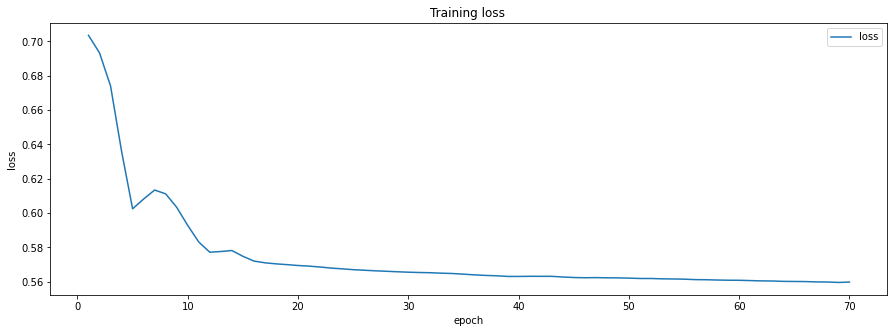

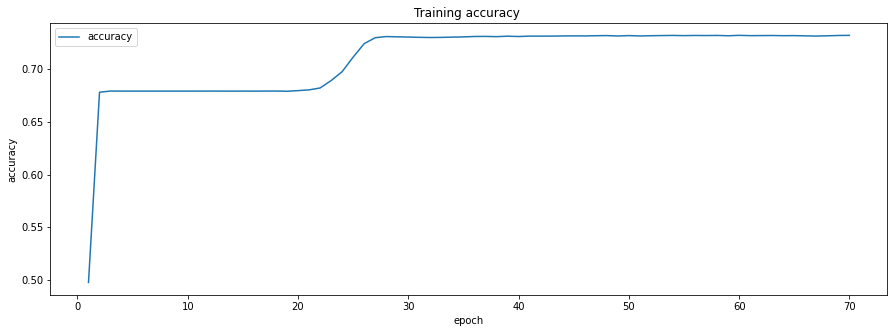

In [ ]:
def plot_train_test():
    ...
    return None  

plot_train_test()

In [ ]:
# prediction
x_test = features_test
pred = model(x_test)

In [ ]:
pred = pred.detach().numpy()

In [ ]:
pred

array([[7.18163669e-01, 2.81836271e-01],
       [5.79198539e-01, 4.20801431e-01],
       [1.05671934e-13, 1.00000000e+00],
       ...,
       [2.72497857e-07, 9.99999762e-01],
       [1.09887151e-06, 9.99998927e-01],
       [2.72999195e-16, 1.00000000e+00]], dtype=float32)

## Accuracy evaluation during train/test phase

In [ ]:
print("The accuracy is", accuracy_score(labels_test, np.argmax(pred, axis=1)))

The accuracy is 0.7312482247809653


In [ ]:
# Checking for first value
np.argmax(model(x_test[0]).detach().numpy(), axis=0)

0

In [ ]:
labels_test[0]

tensor(0)

In [ ]:
torch.save({'state_dict': model.state_dict()}, 'pytorch_model.pkl')

In [ ]:
saved_model = torch.load('pytorch_model.pkl')
model.load_state_dict(saved_model['state_dict'])

<All keys matched successfully>

In [ ]:
np.argmax(model(x_test[0]).detach().numpy(), axis=0)

0

In [ ]:
x_test[0]

tensor([0.0000, 0.0000, 0.0000, 0.3933, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])

In [ ]:
for i in x_test[:3]:
    print(i)
    prediction = np.argmax(model(i).detach().numpy(), axis=0)
    print('prediction', prediction)

tensor([0.0000, 0.0000, 0.0000, 0.3933, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
prediction 0
tensor([0.0000, 0.0000, 0.0000, 0.4047, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
prediction 0
tensor([0.0000, 0.0000, 0.0000, 0.5485, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
        0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])
prediction 1


## Prediction on unknown data

Let's provide the model with new stock data it was not trained on to see how it performs.

In [ ]:
#ticker='BP'
#ticker='ABBV'
#ticker='GILD'
#ticker='NGG'
#ticker='BPY'
ticker='AIR'

#ticker='BTC-USD'

In [ ]:
def plot_stock_prediction(df, ticker):
    ...
    return None   

In [ ]:
# get data from yahoo finance
new_df = get_data(ticker)


[*********************100%***********************]  1 of 1 completed
connected to yahoo


In [ ]:
new_df = compute_technical_indicators(new_df)

In [ ]:
new_df = compute_features(new_df)

In [ ]:
new_df=define_target_condition(new_df)

In [ ]:
saved_model = torch.load("pytorch_model.pkl")

In [ ]:
def predict_timeseries(df):
    ...     
    return df

In [ ]:
new_df = predict_timeseries(new_df)

        Date  Open      High       Low     Close  Adj Close  Volume      EMA5  EMA10  EMA15  ...  aboveEMA100  aboveEMA150  aboveEMA200  aboveUpperBB  belowLowerBB  aboveSAR  oversoldRSI  overboughtRSI  target_cls  Buy
0 1980-03-17   0.0  3.925926  3.814815  3.888889   2.276098    6413  0.000000    0.0    0.0  ...            0            0            0             0             0         0            0              0           1    0
1 1980-03-18   0.0  3.777778  3.592593  3.703704   2.167713   12150  0.000000    0.0    0.0  ...            0            0            0             0             0         0            0              0           1    0
2 1980-03-19   0.0  3.666667  3.629630  3.629630   2.124359    6075  0.000000    0.0    0.0  ...            0            0            0             0             0         0            0              0           1    0
3 1980-03-20   0.0  3.629630  3.481481  3.481481   2.037649    8775  0.000000    0.0    0.0  ...            0            0  

In [ ]:
new_df.head(300)

,Date,Open,High,Low,Close,Adj Close,Volume,EMA5,EMA10,EMA15,...,aboveEMA100,aboveEMA150,aboveEMA200,aboveUpperBB,belowLowerBB,aboveSAR,oversoldRSI,overboughtRSI,target_cls,Buy
0,1980-03-17,0.0,3.925926,3.814815,3.888889,2.276098,6413,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
1,1980-03-18,0.0,3.777778,3.592593,3.703704,2.167713,12150,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,1980-03-19,0.0,3.666667,3.629630,3.629630,2.124359,6075,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
3,1980-03-20,0.0,3.629630,3.481481,3.481481,2.037649,8775,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
4,1980-03-21,0.0,3.555556,3.481481,3.518519,2.059328,12488,2.133029,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1981-05-18,0.0,3.111111,3.037037,3.037037,1.777524,8775,1.814085,1.830937,1.846692,...,0,0,0,0,0,0,0,0,0,0
296,1981-05-19,0.0,3.074074,3.037037,3.037037,1.777524,6075,1.801898,1.821226,1.838046,...,0,0,0,0,0,0,0,0,0,0
297,1981-05-20,0.0,3.111111,3.037037,3.111111,1.820878,6075,1.808225,1.821163,1.835900,...,0,0,0,0,0,0,0,0,0,0
298,1981-05-21,0.0,3.074074,3.074074,3.074074,1.799202,675,1.805217,1.817170,1.831313,...,0,0,0,0,0,0,0,0,0,0


#### Check accuracy on validation data

In [ ]:
print("The validation accuracy is", accuracy_score(new_df['target_cls'], new_df['Buy']))

The validation accuracy is 0.7376065973198388


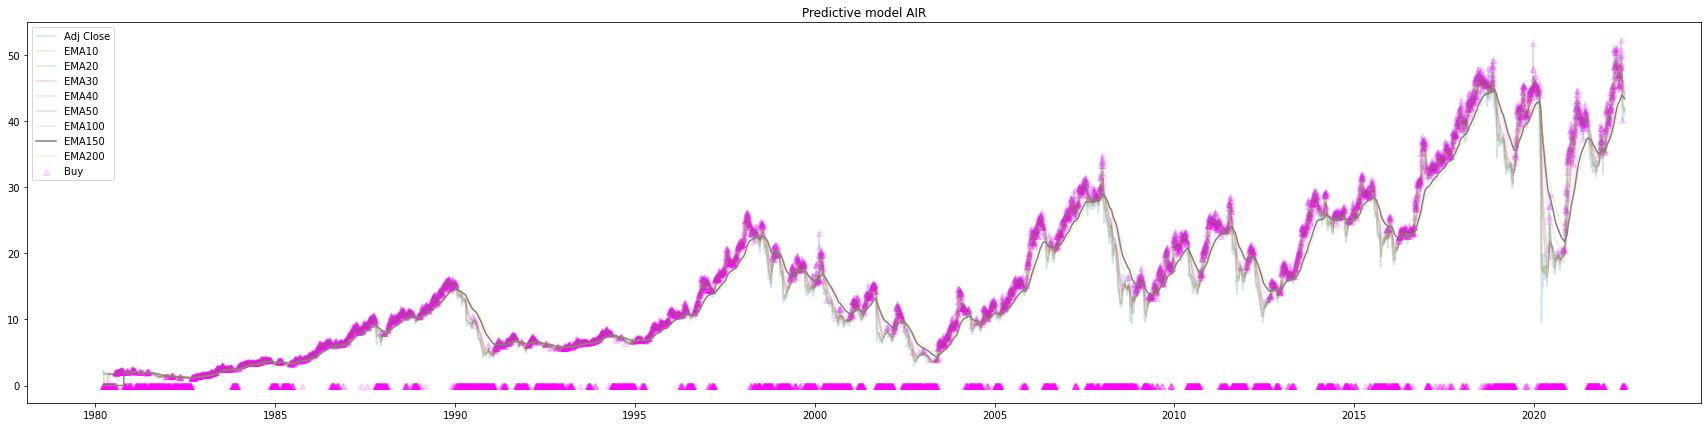

In [ ]:
plot_stock_prediction(new_df, ticker)

In [ ]:
# zoom in on the data
temp_df = new_df[-3000:-2000]

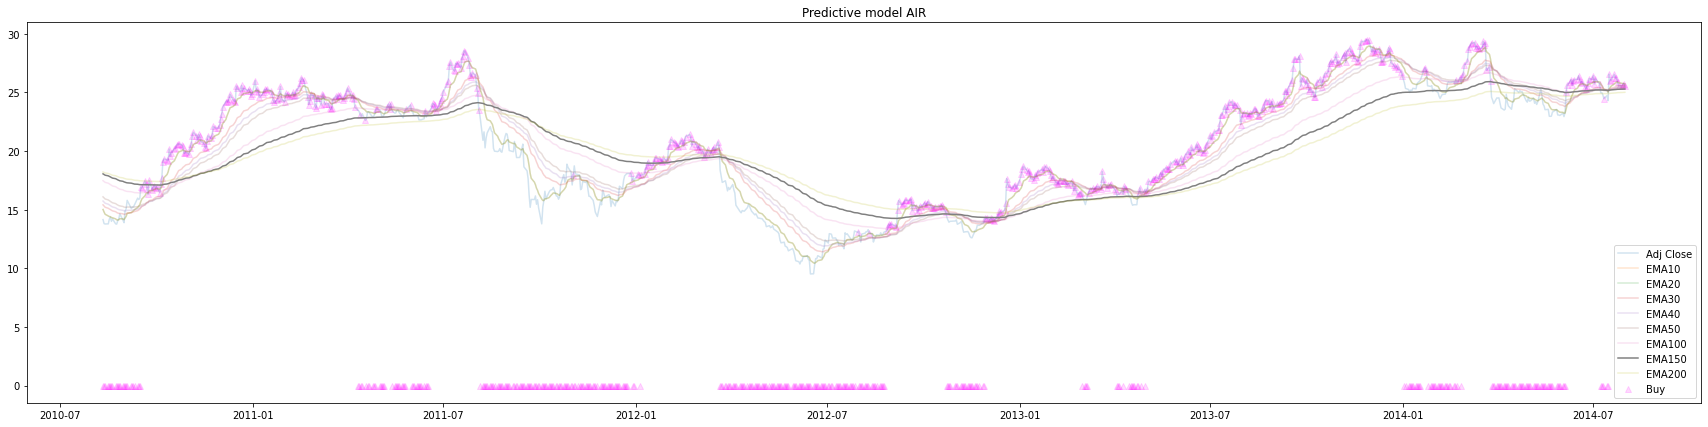

In [ ]:
plot_stock_prediction(temp_df, ticker)

In the testing example (on unseen data) we can see that the model performs very reasonably for identifying overall uptrend. 

#### Note:
when marks are on the price values in the graph, the neural network is signaling 'Buy'. When marks are on 0 level in the graph, network is signalling 'Sell/Don't buy'. 


#### Sources:
- https://www.kaggle.com/aaditkapoor1201/iris-classification-pytorch
- https://blog.quantinsti.com/decision-tree/
- https://medium.com/jovianml/torch-logistic-regression-on-iris-dataset-d966b23339da